## 顔認識

OpenCVを用いた顔認識

### ソフトウェアのインストール

1. 可能ならば普通にインストール

```
conda install opencv
```
https://anaconda.org/main/opencv

コンフリクトが発生する場合、またはコンフリクトの確認に長時間要する場合は、以下の仮想環境を用いる。

2. 仮想環境を作成してインストール

```
conda create -n opencv python=3.9 opencv matplotlib jupyterlab
```

仮想環境への移動
```
conda activate opencv
```

仮想環境の終了
```
conda deactivate
```

### 画像データ

https://aiit.ac.jp/master_program/professor/s_oikawa.html
- 追川の写真

In [1]:
import cv2
import matplotlib.pyplot as plt

# 画像データの読み込み
img = cv2.imread('data/s_oikawa.jpg')

# グレースケールに変換
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

### 顔認識分類器

haarcascade_frontalface_default.xml を data フォルダにコピー。<br>
ファイルの所在（opencv仮想環境を作成した場合）：

Mac
```
/Users/<user name>/anaconda3/envs/opencv/share/opencv4/haarcascades/
```

Windows
```
C:\Users\<user name>\anaconda3\envs\opencv\Library\etc\haarcascades
```

In [2]:
# 顔認識分類器
face_clf = cv2.CascadeClassifier('data/haarcascade_frontalface_default.xml')

# 顔認識処理の実行
face_rects = face_clf.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=1, minSize=(1, 1))

# 認識されたデータの確認
face_rects

array([[ 66,  60, 158, 158]], dtype=int32)

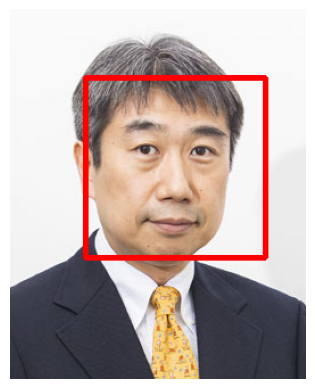

In [3]:
import copy

# 赤
red = (0, 0, 255)

# コピーを作成
img_rect = copy.copy(img)

# 四角形を描画
for rect in face_rects:
        cv2.rectangle(img_rect, tuple(rect[0:2]),tuple(rect[0:2]+rect[2:4]), red, thickness=4)

# matplotlibでの描画用にRGBに変換
img_plt = cv2.cvtColor(img_rect, cv2.COLOR_BGR2RGB)

# 軸等を非表示
plt.axis("off")
# 表示
plt.imshow(img_plt)

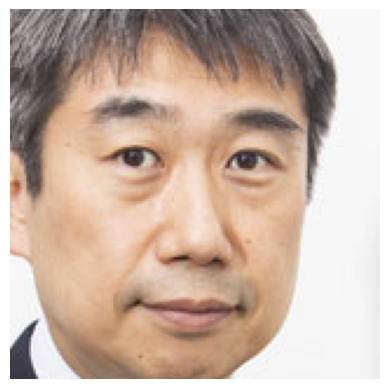

In [4]:
for (x, y, w, h) in face_rects:
    # 四角部分の切り出し
    _im = img[y:y+h, x:x+w]
    # matplotlibでの描画用にRGBに変換
    img_plt = cv2.cvtColor(_im, cv2.COLOR_BGR2RGB)
    # 軸等を非表示
    plt.axis("off")
    # 表示
    plt.imshow(img_plt)
    plt.show()